![Rivflect_banner.png](media/Rivflect_banner.svg)

# Exploring some GNSS reflections from the test deployment at lake Victoria (Oct 26th, 2023) plan and design the GNSS-R dployment at Entebbe Site

Zeleke Challa, Roelof Rietbroek, Oct 2023


In [1]:
from gnssr4water.refl.nmea import readnmea
from gnssr4water.refl.snr import *

import numpy as np
import pandas as pd

In [2]:
#read nnmea data

nmeagzfile="data/LakeVictoriaTest20231026/lvicpi1_2023-10-26_00.gz"

dfnmea=readnmea(nmeagzfile)

display(dfnmea)



lat        lon  elev     az  \
time                system  PRN segment                                     
2023-10-26 13:12:22 GPS     22  1        0.047120  32.472852  77.0  314.0   
                            14  1        0.047120  32.472852  64.0    1.0   
                            40  1        0.047120  32.472852  63.0   90.0   
                            17  0        0.047120  32.472852  42.0  145.0   
2023-10-26 13:12:23 GPS     20  0        0.047120  32.472852  41.0  292.0   
...                                           ...        ...   ...    ...   
2023-10-26 23:59:58 GLONASS 65  59       0.047818  32.472318  40.0   84.0   
                            78  4        0.047818  32.472318  40.0  305.0   
                            76  33       0.047818  32.472318  18.0  166.0   
                            88  15       0.047818  32.472318  12.0  353.0   
                            72  35       0.047818  32.472318   3.0   43.0   

                                          snr   elevsmth      azsmth  
time                system  PRN segment                               
2023-10-26 13:12:22 GPS     22  1        22.0  77.612903  312.421053  
                            14  1        24.0  64.371429    0.573171  
                            40  1        31.0  63.000000   90.000000  
                            17  0        41.0  41.770492  145.378378  
2023-10-26 13:12:23 GPS     20  0        19.0  40.558140  292.368421  
...                                       ...        ...         ...  
2023-10-26 23:59:58 GLONASS 65  59       17.0  40.000000   84.000000  
                            78  4        25.0  40.152542  304.485714  
                            76  33       22.0  17.742857  165.444444  
                            88  15       22.0  11.687500  353.212121  
                            72  35       18.0   2.595238   42.722222  

[140418 rows x 7 columns]

In [4]:
#make a selection for certain azimuths
dfmasked=dfnmea[(dfnmea.azsmth > 120) & (dfnmea.azsmth < 240)]
display(dfmasked)




lat        lon  elev     az  \
time                system  PRN segment                                     
2023-10-26 13:12:22 GPS     17  0        0.047120  32.472852  42.0  145.0   
2023-10-26 13:12:23 GPS     19  0        0.047120  32.472852  32.0  176.0   
                            6   1        0.047120  32.472852  23.0  205.0   
                    GLONASS 69  1        0.047120  32.472852  42.0  127.0   
                            84  0        0.047120  32.472852  10.0  176.0   
...                                           ...        ...   ...    ...   
2023-10-26 23:59:57 GPS     25  47       0.047815  32.472320  48.0  144.0   
2023-10-26 23:59:58 GPS     28  13       0.047818  32.472318  31.0  234.0   
                            32  11       0.047818  32.472318  21.0  191.0   
                            12  27       0.047818  32.472318  10.0  143.0   
                    GLONASS 76  33       0.047818  32.472318  18.0  166.0   

                                          snr   elevsmth      azsmth  
time                system  PRN segment                               
2023-10-26 13:12:22 GPS     17  0        41.0  41.770492  145.378378  
2023-10-26 13:12:23 GPS     19  0        44.0  31.774194  176.368421  
                            6   1        37.0  23.174129  205.603448  
                    GLONASS 69  1        40.0  42.666667  126.500000  
                            84  0        23.0   9.613402  176.529412  
...                                       ...        ...         ...  
2023-10-26 23:59:57 GPS     25  47       23.0  47.727273  144.636364  
2023-10-26 23:59:58 GPS     28  13       31.0  30.080808  233.577778  
                            32  11       23.0  21.000000  191.000000  
                            12  27       24.0   9.541667  143.000000  
                    GLONASS 76  33       22.0  17.742857  165.444444  

[53274 rows x 7 columns]

In [44]:
# explore which segments are the longest
dfgrp=dfmasked.groupby(["PRN","segment"])['elevsmth']
dfcriteria=pd.concat([dfgrp.count().rename('count'),dfgrp.min().rename('minelev')],axis=1)
display(dfcriteria[dfcriteria.index.get_level_values('PRN') < 42].sort_values('minelev'))

count    minelev
PRN segment                  
12  0          684   0.363636
9   1         1034   0.366197
13  19        2694   0.411765
4   1          463   0.515789
30  5          547   0.515789
...            ...        ...
23  34          23  73.541667
    35           1  74.807692
    36          61  74.884615
    37           1  77.655172
    38          72  77.724138

[122 rows x 2 columns]

<Axes: title={'center': 'SNR in Volt/volt for PRN 30'}, xlabel='elevation in degrees', ylabel='[volt/volt]'>

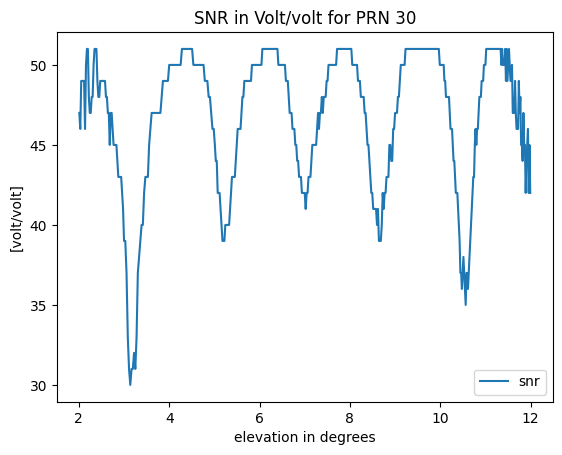

In [52]:
%matplotlib inline
#make a quick plot of SNR versus elevation
prn=30
segm=5

cutmaxelev=60
cutminelev=2
# dfmasked[(dfmasked.index.PRN == prn) and (dfmasked.segment ==segm)]
dfselected=dfmasked[(dfmasked.index.get_level_values('PRN')==prn) & (dfmasked.index.get_level_values('segment')==segm)].sort_values('elevsmth')
dfselected=dfselected[(dfselected.elevsmth < cutmaxelev) & (dfselected.elevsmth > cutminelev)]
dfselected['snrv_v']=np.power(10,dfselected.snr/20)
dfselected['sin_elev']=np.sin(np.deg2rad(dfselected.elevsmth))
dfselected.reset_index().plot(x="elevsmth",y="snr",title=f"SNR in Volt/volt for PRN {prn}",ylabel='[volt/volt]',xlabel='elevation in degrees')

# plotSnr(dfselected,azrange=[0,360],xaxis=1)

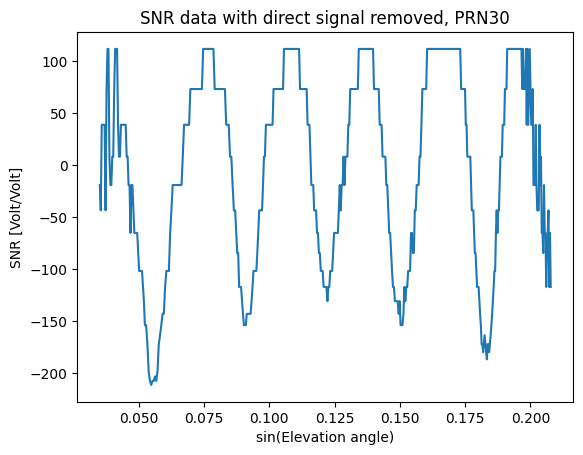

In [51]:
%matplotlib inline
# Detrend and get Lomb-Scargle
dfdetr=detrende_signal(dfselected,prn,order=0)

plot_detrende(dfdetr,prn)



estimated height 3.140611966273671m


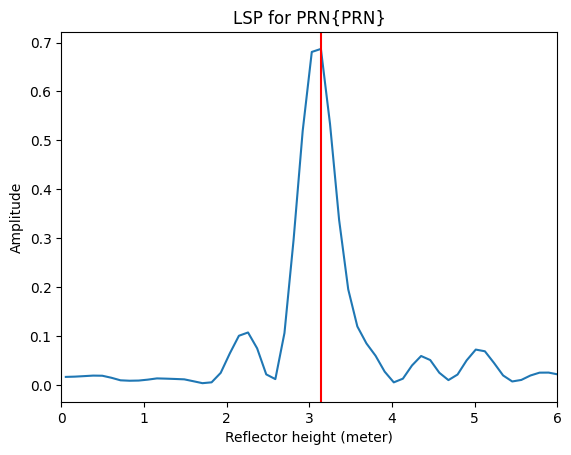

In [48]:
%matplotlib inline
frequency,height,maxF,maxAmp=height_LSP(dfdetr,0,6,prn)

print(f"estimated height {maxF}m")

3.126508121002049